Skipping non-image file: E:\Xai_Req_Setup\126156081\Bean_Dataset\angular_leaf_spot\desktop.ini
Skipping non-image file: E:\Xai_Req_Setup\126156081\Bean_Dataset\bean_rust\desktop.ini
Skipping non-image file: E:\Xai_Req_Setup\126156081\Bean_Dataset\healthy\desktop.ini
Loaded 990 images of size (128, 128, 3).
Class names: ['angular_leaf_spot', 'bean_rust', 'healthy']


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,330,947 (96.63 MB)

 Trainable params: 25,330,947 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.2911 - loss: 17.6216 - val_accuracy: 0.3396 - val_loss: 6.0478
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.3763 - loss: 7.9293 - val_accuracy: 0.3396 - val_loss: 2.3993
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.3757 - loss: 3.7877 - val_accuracy: 0.5723 - val_loss: 1.0330
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.3780 - loss: 1.5553 - val_accuracy: 0.4654 - val_loss: 1.0131
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.3989 - loss: 1.2270 - val_accuracy: 0.4969 - val_loss: 1.0287
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step - accuracy: 0.4842 - loss: 1.0208 - val_accuracy: 0.5472 - val_loss: 0.9429
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.4831 - loss: 0.9916 - val_accuracy: 0.4780 - val_loss: 0.9721
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 289ms/step - accuracy: 0.5313 - loss: 0.9951 - val_accuracy: 0

E:\Xai_Req_Setup\Python3109\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Xai_Req_Setup\Python3109\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Xai_Req_Setup\Python3109\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


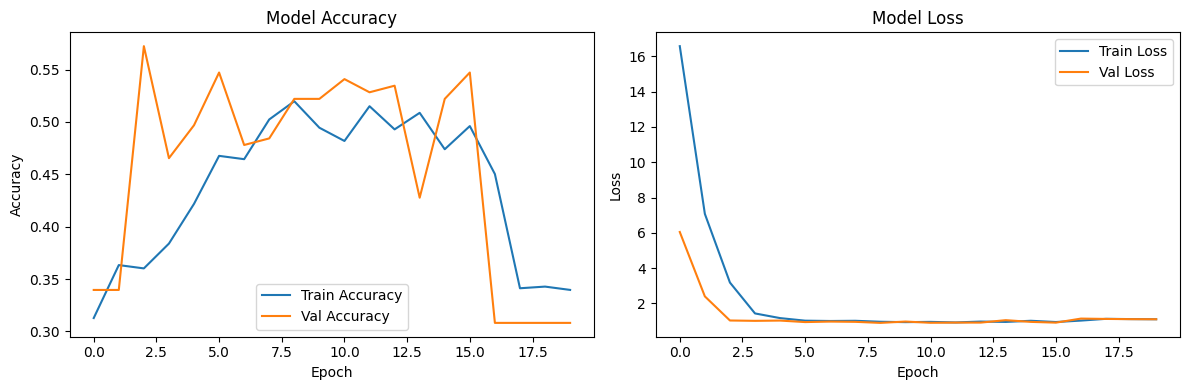

In [8]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import warnings
from PIL import UnidentifiedImageError

# Function to load images and their labels from the dataset folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = [d for d in os.listdir(folder_path) 
                  if os.path.isdir(os.path.join(folder_path, d))]
    
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            
            # Skip non-image files and hidden files
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif')):
                print(f"Skipping non-image file: {file_path}")
                continue
            
            try:
                img = load_img(file_path, target_size=image_size)
                img_array = img_to_array(img) / 255.0  # Normalize pixel values
                images.append(img_array)
                labels.append(label)
            except UnidentifiedImageError:
                print(f"Skipping corrupted or non-image file: {file_path}")
                continue
            except Exception as e:
                print(f"Skipping file {file_path} due to error: {e}")
                continue

    return np.array(images), np.array(labels), class_names

# Load the dataset
dataset_path = r"E:\Xai_Req_Setup\Bean_Dataset"
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images of size {X.shape[1:]}.")
print(f"Class names: {class_names}")

# Check if we have any images loaded
if X.shape[0] == 0:
    raise ValueError("No images were loaded. Please check your dataset path and file formats.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Flatten the image data to feed into the DNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert labels to one-hot encoding
num_classes = len(class_names)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Build the DNN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train_flat, y_train_cat, epochs=20, validation_split=0.2, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Generate predictions and evaluate the model
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)
y_true = y_test  # Already numerical labels

# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)